## **Individual Project - PIL17003689**

---

The Cross Industry Standard Process for Data-Mining (CRISP-DM) will be used for the creation of the artificial intelligence model. This methodology covers multiple phases regarding data cleaning and deployment whilst applying contxt to the processes of such phases.

---

$$Data-Understanding.$$

- **Libraries**

A multitude of libraries are used to perform phases of the CRISP-DM methodology: 
- Pandas :- used for data anlysis and understanding.
- NumPy :- supports mathematical calculations and array formatting.
- Matplotlib :- visualizes data with graphs and charts.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Imports all necessary libraries

data = pd.read_csv("weatherHistory.csv")
# Assigns the dataset to the variable data

$$-$$

- **Dataset Analysis**

After importing libraries, the dataset can be analysed.

In [9]:
data.head()
# Displays the first give rows of the dataset.

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


The .head() function can give examples of the dataset without looking into the csv file itself. From here, information can be found like what the data is and how it is stored. I.e., Summary being a String and Temperature being a Decimal.

In [10]:
data.info()
# Shows the variable state of the columns within the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


These assumptions can be solidified using the .info() function which shows whether data in a column is formatted as an object or float.

In [12]:
data.describe()
# Reveals numerical values such as the mean along with the upper and lower percentiles.

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [13]:
data.describe(include="object") 
# Adjusted describe function to show String values. 

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,96453,96453
unique,96429,27,3,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


Additional data analysis using the .describe() function shows patterns within the data, for example, mostly cloudy days being the most popular with 20085 entries.

---

$$Data-Preparation.$$

- **Filling Null Data**

It should be assumed that the dataset contains errors, so it should be cleaned to ensure it is suitable to be used.

In [8]:
print("Unformatted Data: ")
print(data.isnull().sum())
# Displays the amount of null values within the unformatted data 

data.dropna(subset=["Formatted Date"], inplace=True)
data.fillna(0, inplace=True)
# Drops alls null data under "Formatted Date" with a 0 and fills the rest 

print("\n")
print("Formatted Data: ")
print(data.isnull().sum())
# Displays the amount of null values within the formatted data 

Unformatted Data: 
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


Formatted Data: 
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [131]:
print("Number of rows in unfiltered dataset:", len(data)) 
# Displays the amount of unfiltered rows there are without data cleaning.

Number of rows in filtered dataset: 96453


Data can be missing within a dataset. This can be due to an error in the form submission, or user error. Regardless, these data needs to be cleaned to fully optimise the dataset.
The .isnull() function can determine what data is null within a dataset and, from there, the data can either be filled or removed depending on its importance.

$$-$$

- **Finding Repetitions**

A key error in the dataset is the lack of unique identifiers. Without these, entries cannot be defined uniquely, thus creating the possibility for duplicate entries. At first glance, the dataset lacks an ID column thus one should be created. However, the "Formatted Date" column acts as a unique ID instead. Though, to ensure this can be assumed, a practice can still be executed to compare the "Formal Date" column to a newly constructed ID column, testing whether it acts as a unique identifier.

In [19]:
unique_data = {}
next_id = 1
# Creates an array to store the dataset into along with its ID, as well as an ID number ready to be incremented. 

for index, row in data.iterrows():
    data_tuple = tuple(row)
    # Iterates throughout the array. 
    
    if data_tuple in unique_data:
        data.at[index, 'ID'] = unique_data[data_tuple]
        # If the ID is the same as a previous, it will be assigned the same. 

    else:
        data.at[index, 'ID'] = next_id
        unique_data[data_tuple] = next_id
        next_id += 1
        # If not, then the ID is incremented normally. 

In [20]:
print("A sum of the duplicated Formatted Dates:")
print(data["Formatted Date"].duplicated().sum())
print("\n")
print("A sum of the duplicated IDs:")
print(data["ID"].duplicated().sum())
# Outputs the number of duplicate data from both columns for comparison. 

A sum of the duplicated Formatted Dates:
24


A sum of the duplicated IDs:
24


From this outcome, it can be deduced that the "Formatted Dates" column can be used as a unique identifier. However, it can also be concluded that there are multiple duplicate entries within the data, and these entries need to be dropped as to avoid any margin of error.

In [22]:
data.drop_duplicates(subset='ID', keep='first', inplace=True)
# Drops all duplicate entries in the "ID" column aside from the first instance of it. 
data.reset_index(drop=True, inplace=True)

data["ID"].duplicated().sum()

0

After dropping the duplicate data and ensuring the first instance of it is kept, there remains no sum of duplicates.

$$-$$

- **Data Visualization**

A way in which the effectiveness of data cleaning can be visualised is using a boxplot. This diagram can highlight any outliers within the dataset that may skew results, thus be removed.

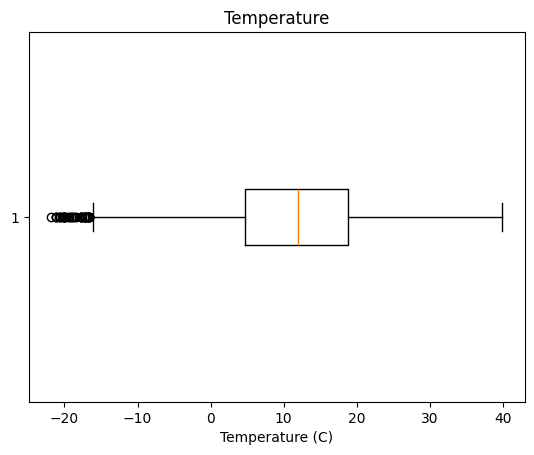

In [23]:
plt.boxplot(data["Temperature (C)"], vert=False)
# Creating a box plot
plt.xlabel("Temperature (C)")
plt.title("Temperature")
# Assigning excess details
plt.show()
# Makes a box plot to refer to the data. The Circles to the far left are called "Whiskers" and they are outliers that need removing.

In this boxplot, outliers have been found as -20°C within the "Temperature (C)" column. To rid of these, the interquartile range is used to find the upper and lower 25% of the data and identify any outliers that find fit the pattern.

In [25]:
dataQuantile = ["Temperature (C)", "Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"] 
# Selects the data that will be used

for idata in dataQuantile:
    Q1 = data[idata].quantile(0.30)
    Q3 = data[idata].quantile(0.60)
    # Calculate the lower and upper quantile ranges
    
    IQR = Q3 - Q1
    # Calculates the Interquantile range

    cutoff = 1.5 * IQR 
    lower, upper = Q1 - cutoff, Q3 + cutoff
    # Removes all potential outliers within the top and bottom 10% of the previously selected data

    data = data[(data[idata] >= lower) & (data[idata] <= upper)] 
    # Applies the newly acquired data to the data variable

In [26]:
print("Number of rows in filtered dataset:", len(data))
# Displays the amount of filtered rows there are without data cleaning.

Number of rows in filtered dataset: 38025


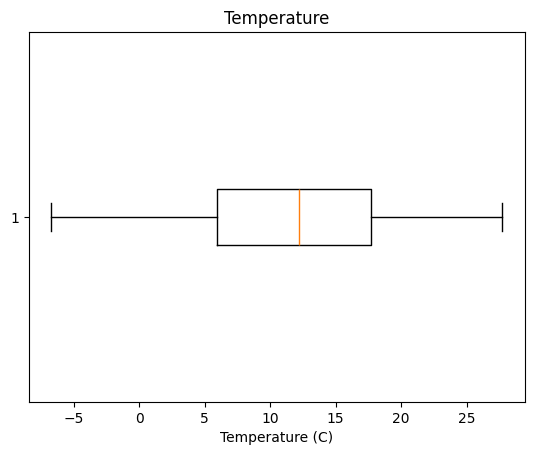

In [27]:
plt.boxplot(data["Temperature (C)"], vert=False)
# Creating a box plot
plt.xlabel("Temperature (C)")
plt.title("Temperature")
# Assigning excess details
plt.show()
# After removing the outliers, the box plot is displayed accordingly after data cleaning.

Now that all outliers have been removed, the data can be visualised in other ways, such as bar and line graphs that represent patterns in the data.

In [44]:
# Print the data of the 45th bottom entry
bottom_45th_entry = data.iloc[-45]
print("Data of the 45th bottom entry:")
print(bottom_45th_entry)

Data of the 45th bottom entry:
Formatted Date                                  2016-09-30 23:00:00.000 +0200
Summary                                                         Mostly Cloudy
Precip Type                                                              rain
Temperature (C)                                                     13.644444
Apparent Temperature (C)                                            13.644444
Humidity                                                                 0.83
Wind Speed (km/h)                                                      5.3291
Wind Bearing (degrees)                                                  165.0
Visibility (km)                                                       14.8764
Loud Cover                                                                0.0
Pressure (millibars)                                                  1017.97
Daily Summary               Partly cloudy starting in the morning continui...
ID                               

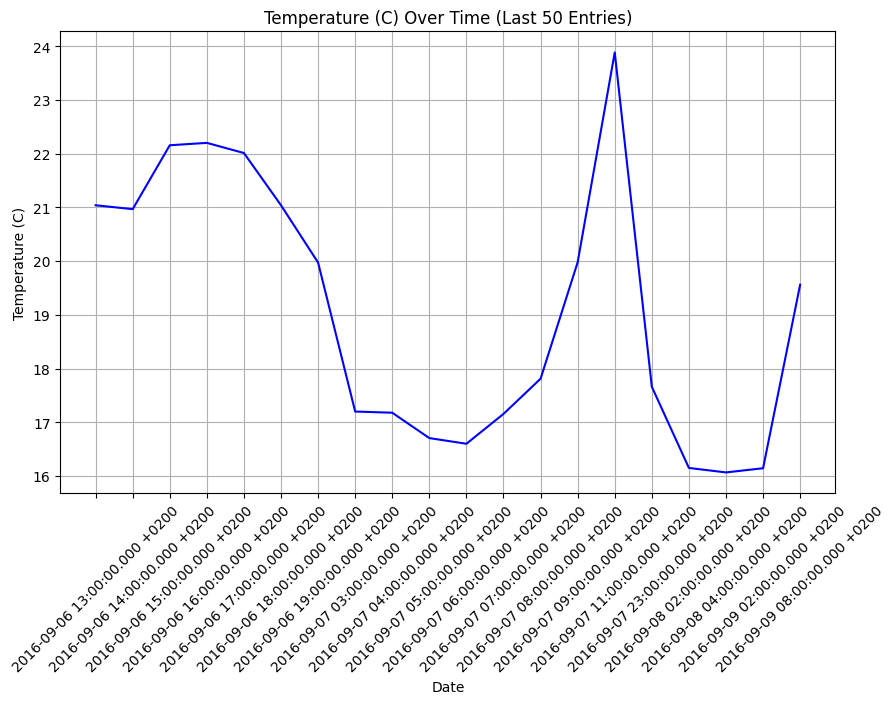

In [55]:
data_datetime = data.copy()

# Set 'Formatted Date' column as the index
data_datetime.set_index('Formatted Date', inplace=True)

# Select the last 50 entries for the training set
training_set = data_datetime.tail(20)

# Plot Temperature (C) over time for the training set
plt.figure(figsize=(10, 6))
plt.plot(training_set.index, training_set['Temperature (C)'], color='blue')
plt.title('Temperature (C) Over Time (Last 50 Entries)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.show()

In [63]:
#data_datetime['Formatted Date'] = pd.to_datetime(data_datetime['Formatted Date'], errors='coerce', utc=True)

# Check for any rows where 'Formatted Date' could not be parsed
#missing_dates = data_datetime[data_datetime['Formatted Date'].isnull()]

#print("Rows with missing or invalid dates:")
#print(missing_dates)

Rows with missing or invalid dates:
Empty DataFrame
Columns: [Formatted Date, Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Loud Cover, Pressure (millibars), Daily Summary, ID]
Index: []


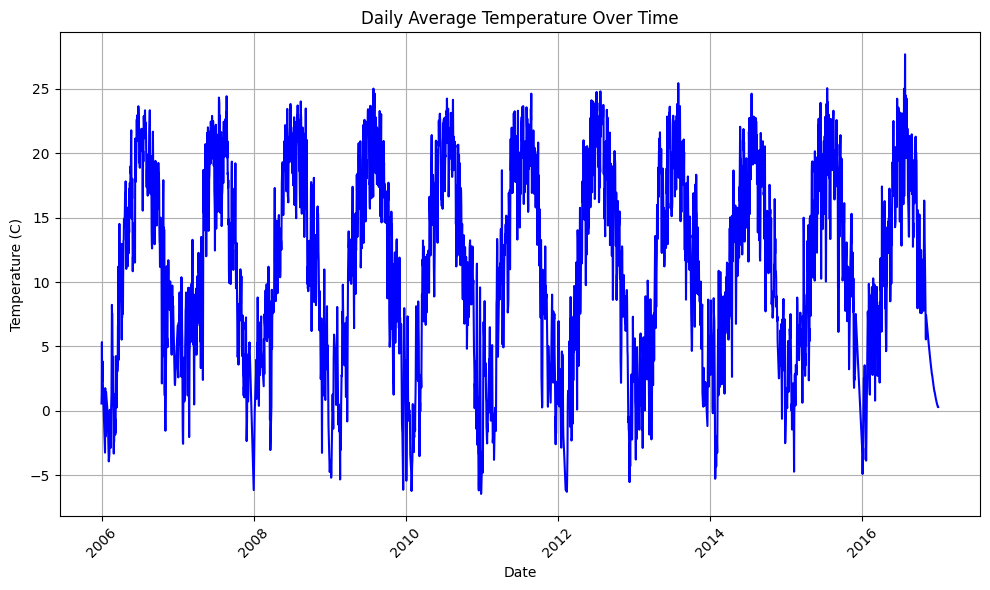

In [66]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)

# Extract date from 'Formatted Date' column
data['Date'] = data['Formatted Date'].dt.date

# Calculate daily average temperature
daily_avg_temp = data.groupby('Date')['Temperature (C)'].mean()

# Plot daily average temperature over time
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_temp.index, daily_avg_temp.values, color='blue')
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()